In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
D=pd.read_csv("../Housing Prices/train.csv")

In [4]:
D6=pd.read_csv("../Housing Prices/train.csv")
y=D6.SalePrice.copy()
type(y)

pandas.core.series.Series

In [5]:
# D.columns

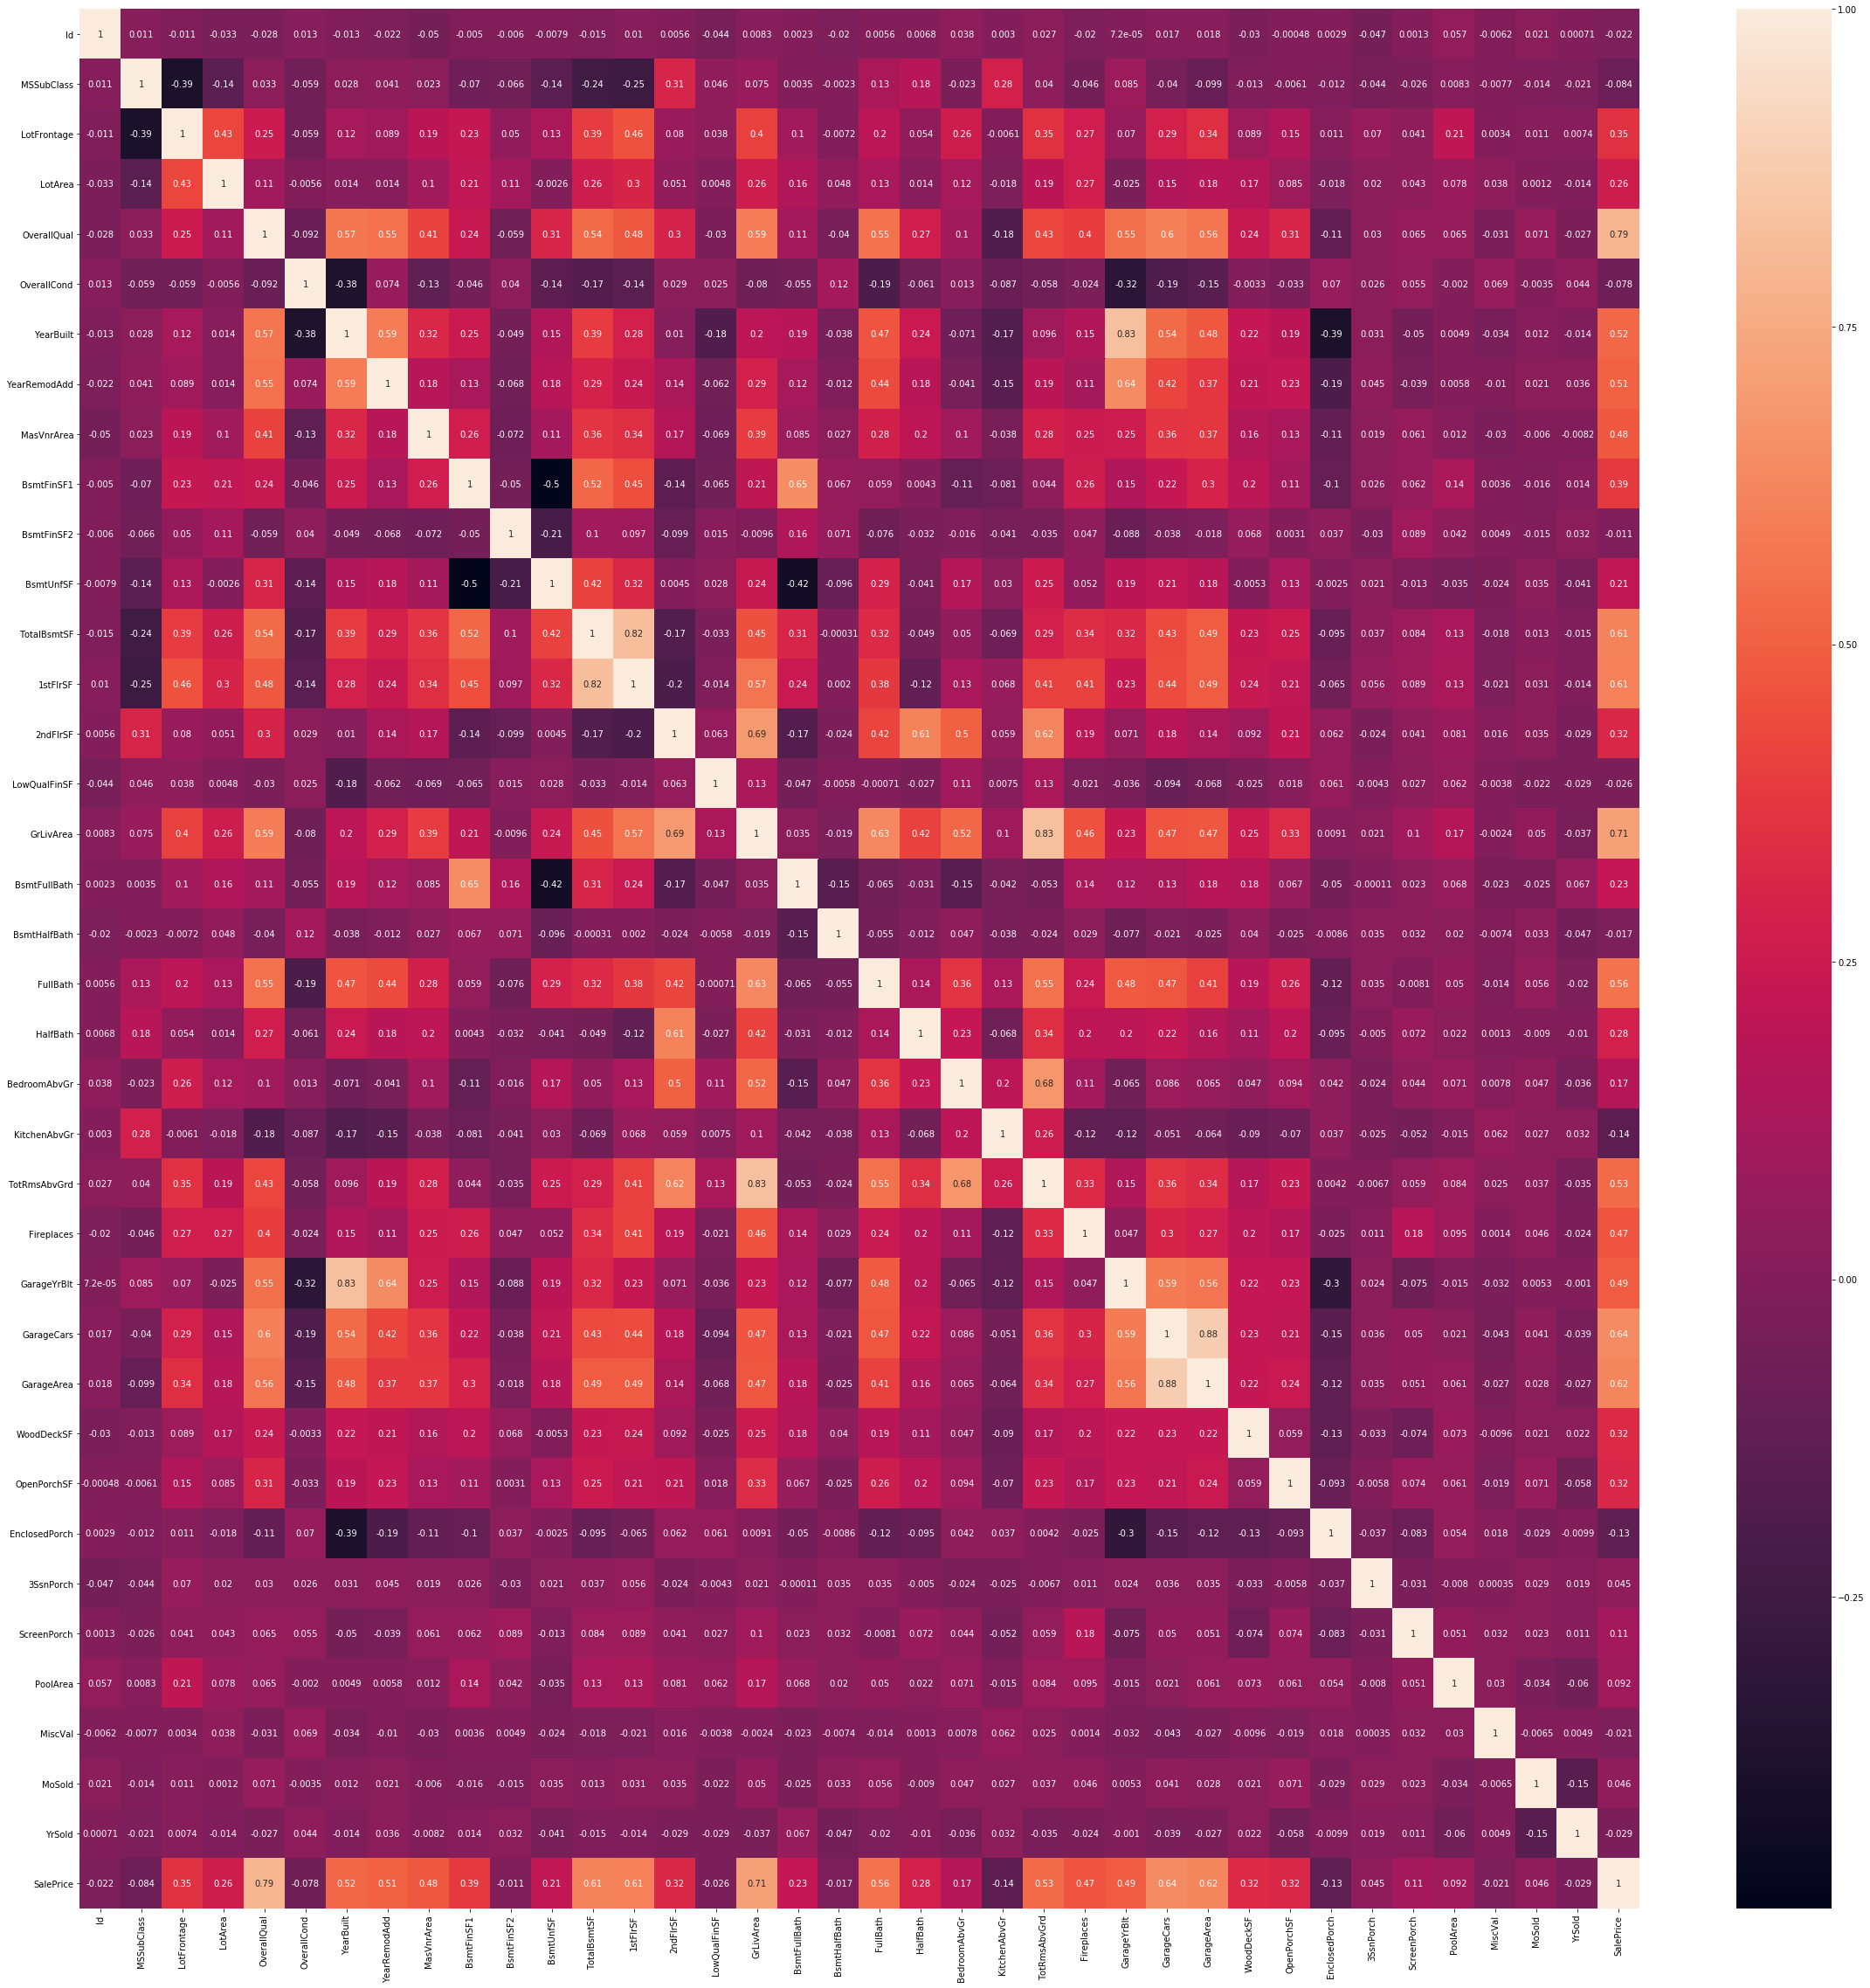

In [6]:
fig, ax=plt.subplots(figsize=(40,40))
sns.heatmap(D.corr(),annot=True)

there are a lot of features that are highly correlated. for example first floor area and basement area. what I could do is find correlated features and combine them using factor analysis or partial least squares. Before doing that manually, i'll give it  a go with PCA. 


Prior to PCA, I should take a look at some key relations, visualise.

another thing I must do is adress data type and encoding. 

In [7]:
# sns.regplot(x=D.OverallQual, y=D.SalePrice);
# it seems like there is alinear relation however we have a lot of deviation in quality for each price bar. 

It seems a good idea to manually sort the features and group for plotting purposes and later on to examin correlation. I can do this by simply checking which values correlate but i"l use old school pencil and paper.It got tedious. lol

In [8]:
def encoder(var):
    return var.astype("category").cat.codes
    

In [9]:
Objects=D.columns[D.dtypes==object]
# D[Objects]

I want to encode all of these. I'll first check which of these has too many categries and needs some outlier fixing etc. All extra categories will go into something like "others". To do this I want to see how it all looks. I am lazy so I am going to try to build a function that plots all of these.

In [10]:
# # fig, ax=plt.subplot()
# for col in Objects:
# #     for i in range (1,45):
#         plt.figure
# #         plt.subplot(9,5,i)
# #         sns.catplot(x=col,y="SalePrice",)
#         sns.catplot(x=col,y="SalePrice", kind="box",data=D)
    

In [11]:
# # SaleQuality=D.groupby("SalePrice")["OverallQual"].count()a
# fig,ax=plt.subplots(figsize=(20,5))
# sns.countplot(D["Neighborhood"]);

In [12]:
# SaleQuality=D.groupby("SalePrice")["OverallQual"].count()a
# fig,ax=plt.subplots(figsize=(20,5))
# sns.catplot(x="Exterior1st", y="SalePrice",data=D,ax=ax);

In [13]:
# # SaleQuality=D.groupby("SalePrice")["OverallQual"].count()a
# fig,ax=plt.subplots(figsize=(20,5))
# sns.catplot(x="Condition1", y="SalePrice",data=D,ax=ax);

In [14]:
# # SaleQuality=D.groupby("SalePrice")["OverallQual"].count()a
# fig,ax=plt.subplots(figsize=(20,5))
# sns.catplot(x="Condition2", y="SalePrice",data=D,ax=ax);

In [15]:
# for col in Objects:
# #     for i in range (1,45):
# #         plt.subplot(9,5,i)
#         sns.catplot(x=col,y="SalePrice",data=D)
    

From these plot, there are obviously categories with very little data that are oulier, so these will be grouped as others, then there are categories for example in neighbourhood where a bunch of them seem to fall under one price range and others at another sot hese should be grouped accordingly so as to avoid overfitting. again there are categories where the data in one category is very high and others are neglible. We can Observe these by count etc but for now I am just going to drop them. A very important point to note here is that because the whole data set is skewed, its hard to have a good visual estimate. I am going to look for a way to deal with the skewness: ie the bulk of the data in this case being in the range of 100-300k sale price.edit: it turns out that skewed data affects the models, much like I anticipated.

In [16]:
# for col in Objects:
#     plt.figure()
#     sns.countplot(x=col,data=D)
# #         print(col)
    

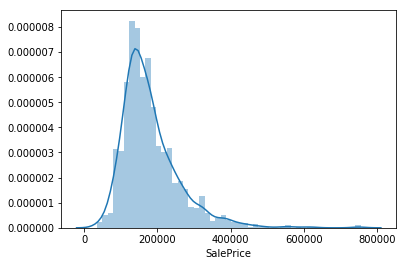

In [17]:
plt.figure()
sns.distplot(D.SalePrice)

In [18]:
D2=D[D.SalePrice>500000]

In [19]:
D2.T

,178,440,691,769,803,898,1046,1169,1182
Id,179,441,692,770,804,899,1047,1170,1183
MSSubClass,20,20,60,60,60,20,60,60,60
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RL
LotFrontage,63,105,104,47,107,100,85,118,160
LotArea,17423,15431,21535,53504,13891,12919,16056,35760,15623
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,IR1,Reg,IR1,IR2,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,HLS,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [20]:
# D.isna().sum()

In [21]:
Object3=[]
for col in D.columns:
    if D[col].dtype=='float64' or D[col].dtype== 'int64':
            D[col].fillna(D[col].median(),inplace=True)
            Object3.append(col)
    else:
        D[col].fillna(D[col].value_counts().idxmax(),inplace=True)

In [22]:
D2=D[Object3].copy()
    


In [23]:
D2.drop(['Id','SalePrice'],axis=1,inplace=True)
D2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [24]:
from sklearn.preprocessing import StandardScaler
StandardScaler(copy=True, with_mean=True, with_std=True)
scaler = StandardScaler()
D2=scaler.fit_transform(D2)


In [25]:
# import numpy as np
from sklearn.decomposition import PCA
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=30)
D3=pca.fit_transform(D2)


var=pca.explained_variance_ratio_
var1=np.cumsum(np.round(var,decimals=4)*100)

print(var1)  


[19.79 28.69 35.84 41.46 45.56 48.87 52.07 55.22 58.3  61.32 64.23 67.07
 69.88 72.53 75.08 77.58 79.93 82.19 84.37 86.42 88.29 90.03 91.66 93.16
 94.36 95.44 96.31 97.09 97.8  98.47]


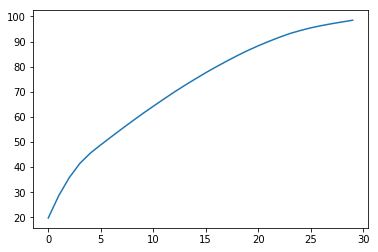

In [26]:
plt.plot(var1)

In [27]:
Object2=['MSZoning','Street','LotShape','LotConfig','Condition1','BldgType','Neighborhood','HouseStyle','Exterior1st','Exterior2nd','BsmtFinType1','Electrical','FireplaceQu','GarageType','SaleType','SaleCondition']

In [28]:
# for col in D.columns:
#     if col in Objects and col not in Object2:
#         D.drop([col],axis=1,inplace=True)

In [29]:
D4=D[Object2]

In [30]:
D4

,MSZoning,Street,LotShape,LotConfig,Condition1,BldgType,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,BsmtFinType1,Electrical,FireplaceQu,GarageType,SaleType,SaleCondition
0,RL,Pave,Reg,Inside,Norm,1Fam,CollgCr,2Story,VinylSd,VinylSd,GLQ,SBrkr,Gd,Attchd,WD,Normal
1,RL,Pave,Reg,FR2,Feedr,1Fam,Veenker,1Story,MetalSd,MetalSd,ALQ,SBrkr,TA,Attchd,WD,Normal
2,RL,Pave,IR1,Inside,Norm,1Fam,CollgCr,2Story,VinylSd,VinylSd,GLQ,SBrkr,TA,Attchd,WD,Normal
3,RL,Pave,IR1,Corner,Norm,1Fam,Crawfor,2Story,Wd Sdng,Wd Shng,ALQ,SBrkr,Gd,Detchd,WD,Abnorml
4,RL,Pave,IR1,FR2,Norm,1Fam,NoRidge,2Story,VinylSd,VinylSd,GLQ,SBrkr,TA,Attchd,WD,Normal
5,RL,Pave,IR1,Inside,Norm,1Fam,Mitchel,1.5Fin,VinylSd,VinylSd,GLQ,SBrkr,Gd,Attchd,WD,Normal
6,RL,Pave,Reg,Inside,Norm,1Fam,Somerst,1Story,VinylSd,VinylSd,GLQ,SBrkr,Gd,Attchd,WD,Normal
7,RL,Pave,IR1,Corner,PosN,1Fam,NWAmes,2Story,HdBoard,HdBoard,ALQ,SBrkr,TA,Attchd,WD,Normal
8,RM,Pave,Reg,Inside,Artery,1Fam,OldTown,1.5Fin,BrkFace,Wd Shng,Unf,FuseF,TA,Detchd,WD,Abnorml
9,RL,Pave,Reg,Corner,Artery,2fmCon,BrkSide,1.5Unf,MetalSd,MetalSd,GLQ,SBrkr,TA,Attchd,WD,Normal


In [31]:
D4.LotShape.replace(['IR2','IR3'], 'other', inplace=True)

/home/charlie/environments/PFDS/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [32]:
# S=D4.Condition1.value_counts()<100.

D4.Condition1.replace(['Feedr','Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'],'other',inplace=True)
# S.index

/home/charlie/environments/PFDS/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
D4.Exterior1st.replace(['CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','AsphShn','CBlock','ImStucc'],'other',inplace=True)


/home/charlie/environments/PFDS/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [34]:
D4.Exterior2nd.value_counts()
D4.Exterior2nd.replace(['CemntBd','BrkFace','Wd Shng','Stucco','AsbShng','Brk Cmn','Stone','AsphShn','CBlock','other'],'other',inplace=True)


/home/charlie/environments/PFDS/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [35]:
D4.Electrical.replace(['FuseA','FuseF','FuseP','Mix'],'other',inplace=True)

/home/charlie/environments/PFDS/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [36]:
D4.GarageType.replace(['BuiltIn','Basment','CarPort','2Types'],'other',inplace=True)

/home/charlie/environments/PFDS/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
D4.SaleType.replace(['COD','ConLD','ConLw','ConLi','CWD','Oth','Con'],'other',inplace=True)

/home/charlie/environments/PFDS/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [38]:
D4.SaleCondition.replace(['Family','Alloca','AdjLand'],'other',inplace=True)

/home/charlie/environments/PFDS/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [39]:
# D3

In [40]:
# for col in Objects2:
for col in D4:
    D4[col]=encoder(D4[col])

/home/charlie/environments/PFDS/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
D3=pd.DataFrame(D3)

D5=pd.concat([D3,D4],axis=1)

D3

In [42]:
# D3

In [43]:
D5

,0,1,2,3,4,5,6,7,8,9,...,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,BsmtFinType1,Electrical,FireplaceQu,GarageType,SaleType,SaleCondition
0,1.466021,0.375461,-1.698616,-1.935831,0.530367,-1.219198,-0.818926,-0.161224,-0.589498,0.015576,...,5,5,3,6,2,0,2,0,2,1
1,-0.032837,-1.058352,1.259901,-0.039478,-1.734416,0.335394,3.477630,-0.662057,-0.070156,0.272488,...,24,2,1,3,0,0,4,0,2,1
2,1.652691,0.252552,-1.475425,-1.374305,-0.129607,0.322096,-0.481370,-0.126639,-0.639241,-0.023010,...,5,5,3,6,2,0,4,0,2,1
3,-0.368137,1.036425,0.782022,-0.183519,0.481696,-0.385460,-1.670154,0.869709,-1.620605,-1.456482,...,6,5,4,8,0,0,2,1,2,0
4,4.411778,1.115727,-0.514540,-1.393566,-0.108843,0.694077,0.143845,-0.496510,-1.113592,0.206587,...,15,5,3,6,2,0,4,0,2,1
5,-0.691908,-1.937252,-1.116489,-1.311296,-0.923972,-0.645103,2.400161,-1.895584,-3.036775,-3.409193,...,11,0,3,6,2,0,2,0,2,1
6,3.164832,-2.512440,0.418467,-0.239304,0.651758,0.477908,0.722904,0.597987,-0.425634,-0.181511,...,21,2,3,6,2,0,2,0,2,1
7,1.996122,1.255929,1.395152,-2.217112,-0.631968,0.221846,-0.549510,0.708804,-0.679844,-1.481046,...,14,5,0,1,0,0,4,0,2,1
8,-0.884487,2.823412,1.624255,1.275710,2.595268,0.080783,-0.475509,-0.729948,0.547299,-1.460502,...,17,0,5,8,5,1,4,1,2,0
9,-3.188653,-0.118949,1.356128,-1.957844,3.940915,0.609694,-0.008691,-0.775949,2.017318,-1.555590,...,3,1,1,3,2,0,4,0,2,1


In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(D5,y,test_size=0.33,random_state=45)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=45)


In [46]:
from pprint import pprint
pprint(rf.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 45,
 'verbose': 0,
 'warm_start': False}


In [60]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=500, stop =1000, num=2)]
max_features=["auto","sqrt"]
# max_leaf_nodes
# max_depth=[]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
pardist={'n_estimators':n_estimators,'max_features':max_features,
         'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}



rf_est=RandomizedSearchCV(estimator=rf, param_distributions=pardist, n_iter=10, 
                   fit_params=None, n_jobs=-1,  cv=2, 
                   verbose=10,)

In [62]:
rf_est.fit(x_train,y_train)
# pprint(pardist)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/charlie/environments/PFDS/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt 
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto 
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt 
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, score=0.014684287812041116, total=   7.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=auto, score=0.011747430249632892, total=   7.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, score=0.011747430249632892, total=  11.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt 
[CV]  n_estimators=1000, min_samples_

KeyboardInterrupt: 

In [61]:
rf_est.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [66]:
rf2=RandomForestClassifier(n_estimators= 3000,min_samples_split= 5,min_samples_leaf= 2)

In [67]:
rf2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
rf2.score(x_test,y_test)
# print_score(rf2)

0.02074688796680498